# Titanic Exploratory Data Analysis

Reference:[TarekDib03](https://github.com/TarekDib03/titanic-EDA)

This exercise performs __Exploratory Data Analysis__(`EDA`) on titanic data set. 

The data set was downloaded from kaggle website [HERE](https://www.kaggle.com/c/titanic/data). 

## Tutorial Overview
This tutorial is divided into 6 parts

- 1.  Import Libraries
- 2.  Data exploration
- 2.1 Data Dictionary
- 2.2 Agrupaciones
- 2.3 Exploracion de grupos
- 2.4 Explorar sobrevivientes (pivot table)
- 2.5 Explorar sobrevivientes (dataset filter)
- 2.6 Explorar sobrevivientes (crosstab)
- 2.7 Explorar distribucion edad (histogram)
- 2.8 Explorar pasageros por edad (kde plot)
- 2.9 Explorar pasageros por cabina 
- 2.10 Explorar pasageros por procedencia y abordaje
- 2.11 Explorar pasageros con familia y sin ella
- 2.12 Exploar factores que afectaron la sobreviviencia (lmplot, factorplot)



## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

from pandas import Series, DataFrame

%matplotlib inline

## 2. Data exploration

In [2]:
titanic_df = pd.read_csv('..\\..\\..\\data\\kaggle-titanic-train.csv')
titanic_df.shape

(891, 12)

In [3]:
# chenck the first 5 rows
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# chenck the last 5 rows
titanic_df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 2.1 Data Dictionary
- | Variable | Definition | Key | 
- | --- | --- | --- |
- | survival | Survival | 0 = No, 1 = Yes |
- | pclass | Ticket class | 1 = 1st [Upper], 2 = 2nd [Middle], 3 = 3rd [Lower] |
- | sex | Sex |  |
- | Age | Age in years | Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 |
- | sibsp | # of siblings / spouses aboard the Titanic |  |
- | parch | # of parents / children aboard the Titanic |  |
- | ticket | Ticket number |  |
- | fare | Passenger fare |  |
- | cabin | Cabin number |  |
- | embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |


Observaciones preliminares:

- Se observan valores 'NAN' para: Age y cabin
- Atributos tales como: id, nombre y numero tiquete no parecen preliminarmente relevantes.

Nota. Considerar completar la edad considerando el sexo del pasagero.
Nota. Considerar para la aproximacion de la 'cabina' la tarifa (fare) del pasagero y 'pclass'.

In [5]:
# columns name
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# information about the data set
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Observaciones preliminares:

- Un total de 177 (19.865%) de las observaciones de 'edad' han sido omitidas, considerar imputar los datos considerando el sexo del pasagero
- Un total de 687 (77.10%) de las observaciones de 'cabina' han sido omitidas, es poco probable la imputacion de estos datos sin causar un sesgo en los cálculos subsiguientes.
- Un total de 2 (0.224%) de las observaciones de 'embarcadero' han sido omitidas, considera la imputacion de los datos.
    
Nota. Considerar la codificacion de 'sex'.


In [95]:
# Drop missing values for the records in which 'Cabin' is missing
titanic_df['Parch'].dtype, titanic_df['SibSp'].dtype, len(titanic_df.Cabin), len(titanic_df.Cabin.dropna())

(dtype('int64'), dtype('int64'), 891, 204)

In [96]:
# Lets have a look at the first 10 rows of the data frame
titanic_df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.2 Agrupaciones

In [18]:
# number of passenger by class
titanic_df.groupby('Survived')['Survived'].count()


Survived
0    549
1    342
Name: Survived, dtype: int64

In [17]:
# number of passenger by class
titanic_df.groupby('Pclass')['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

In [103]:
# number of passenger by class
print(titanic_df.groupby('Sex')['Sex'].count())

# Count number of men, women and children
print(titanic_df['Sex'].value_counts())

Sex
female    314
male      577
Name: Sex, dtype: int64
male      577
female    314
Name: Sex, dtype: int64


In [131]:
# number of passenger by class
print(titanic_df.groupby('Embarked')['Embarked'].count())

print(titanic_df.Embarked.value_counts())

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


### 2.3 Exploracion de grupos

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64


Text(0.5, 0.98, 'THIS IS A TITLE, YOU BET')

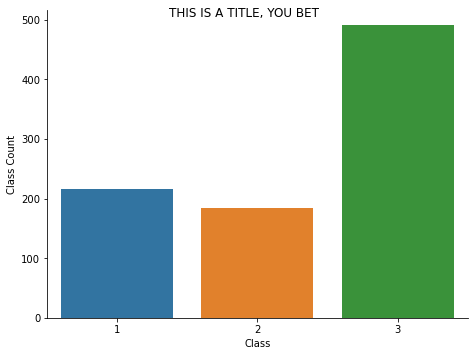

In [46]:
# number of passenger by class
print(titanic_df.groupby('Pclass')['Pclass'].count())

# instead of 'group by' will use 'seaborn' in order to plot class distribution
fg = sns.catplot('Pclass', data=titanic_df, kind='count', aspect=1.3)
fg.set_xlabels('Class')
fg.set_ylabels('Class Count')
fg.fig.suptitle('THIS IS A TITLE, YOU BET')

__Hay casi el doble de pasageros en clase 'economica' respecto a las otras dos clases convinadas__

Sex
female    314
male      577
Name: Sex, dtype: int64


Text(0.5, 0.98, 'THIS IS A TITLE, YOU BET')

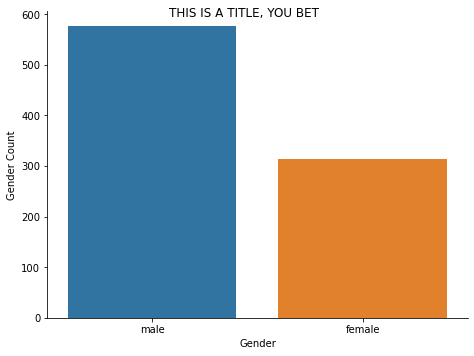

In [48]:
# number of passenger by class
print(titanic_df.groupby('Sex')['Sex'].count())

# instead of 'group by' will use 'seaborn' in order to plot class distribution
fg = sns.catplot('Sex', data=titanic_df, kind='count', aspect=1.3)
fg.set_xlabels('Gender')
fg.set_ylabels('Gender Count')
fg.fig.suptitle('THIS IS A TITLE, YOU BET')

__Hay casi el doble de 'barones' respecto a 'mujeres'__

Nota. Debe considerar se esto puede generar un sesgo por 'devalance de clasificacion'

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Sex, dtype: int64


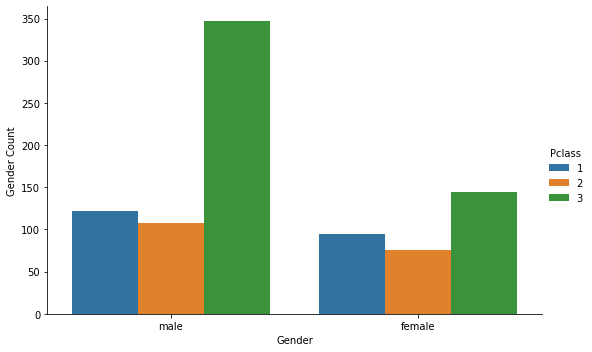

In [52]:
# number of men and women in each of the passenger class
print(titanic_df.groupby(['Sex','Pclass'])['Sex'].count())

# instead of use group by will use seaborn
g = sns.catplot('Sex', data=titanic_df, hue='Pclass', kind='count', aspect=1.5)
g.set_xlabels('Gender')
g.set_ylabels('Gender Count')

In [ ]:
- La relacion del doble 'masculino' respecto al femenino se repite el el grupo de clase 'económica'.
- Las otras clases aparentan estar mas equilibrada.

__invirtamos las clasificaciones__

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Sex, dtype: int64


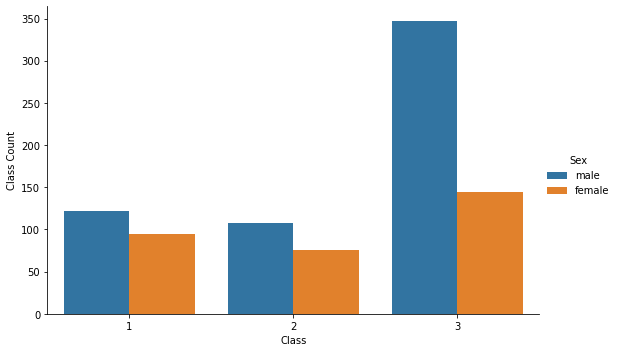

In [53]:
print(titanic_df.groupby(['Pclass','Sex'])['Sex'].count())

# instead of use group by will use seaborn
g = sns.catplot('Pclass', data=titanic_df, hue='Sex', kind='count', aspect=1.5)
g.set_xlabels('Class')
g.set_ylabels('Class Count')

Como se muestra en la figura anterior, hay más de dos veces hombres que mujeres en la clase 3. Sin embargo, en las clases 1 y 2, la proporción de hombres a mujeres es casi 1.

In [ ]:
### 2.4 Explorar sobrevivientes (pivot table)

In [57]:
# Number of passengers who survived in each class grouped by sex.
# Also total was found for each class grouped by gender.
titanic_df.pivot_table('Survived', 'Sex', 'Pclass', aggfunc=np.sum, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,91,70,72,233
male,45,17,47,109
All,136,87,119,342


In [58]:
# Number of passengers who survived in each gender grouped by clas.
# Also total was found for each class grouped by class.
titanic_df.pivot_table('Survived', 'Pclass', 'Sex', aggfunc=np.sum, margins=True)

Sex,female,male,All
Pclass,,,
1,91,45,136
2,70,17,87
3,72,47,119
All,233,109,342


### 2.5 Explorar sobrevivientes (dataset filter)

In [68]:
# total number of passenger who did't survive
not_survived = titanic_df[titanic_df['Survived']==0]
print(len(not_survived))

# Number of passengers who did not survive in each class grouped by sex.
not_survived.pivot_table('Survived', 'Sex', 'Pclass', aggfunc=len, margins=True)

549


Pclass,1,2,3,All
Sex,,,,
female,3,6,72,81
male,77,91,300,468
All,80,97,372,549


In [67]:
# Number of passengers who did not survive in each class grouped by sex.
not_survived.pivot_table('Survived', 'Pclass', 'Sex', aggfunc=len, margins=True)

Sex,female,male,All
Pclass,,,
1,3,77,80
2,6,91,97
3,72,300,372
All,81,468,549


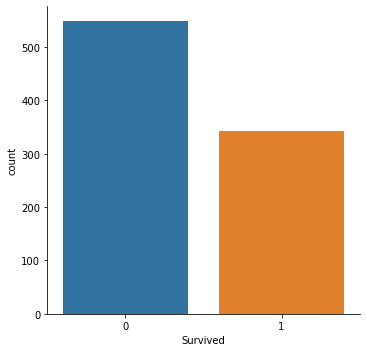

In [60]:
# plot those who survided vs. who did't
sns.catplot('Survived', data=titanic_df, kind='count', aspect=1)

### 2.6 Explorar sobrevivientes (crosstab)

In [69]:
# Passengers who survived and who didn't survive grouped by class and sex
table = pd.crosstab(index=[titanic_df.Survived, titanic_df.Pclass], columns=[titanic_df.Sex, titanic_df.Embarked])
table.unstack()

Sex      female                              male                           \
Embarked      C         Q          S            C         Q          S       
Pclass        1  2   3  1  2   3   1   2   3    1  2   3  1  2   3   1   2   
Survived                                                                     
0             1  0   8  0  0   9   2   6  55   25  8  33  1  1  36  51  82   
1            42  7  15  1  2  24  46  61  33   17  2  10  0  0   3  28  15   

Sex            
Embarked       
Pclass      3  
Survived       
0         231  
1          34

In [70]:
table.columns

MultiIndex([('female', 'C'),
            ('female', 'Q'),
            ('female', 'S'),
            (  'male', 'C'),
            (  'male', 'Q'),
            (  'male', 'S')],
           names=['Sex', 'Embarked'])

In [71]:
table.index

MultiIndex([(0, 1),
            (0, 2),
            (0, 3),
            (1, 1),
            (1, 2),
            (1, 3)],
           names=['Survived', 'Pclass'])

In [72]:
# Change name of columns
table.columns.set_levels(['Female', 'Male'], level=0, inplace=True)
table.columns.set_levels(['Cherbourg','Queenstown','Southampton'], level=1, inplace=True)
table

Sex                Female                             Male             \
Embarked        Cherbourg Queenstown Southampton Cherbourg Queenstown   
Survived Pclass                                                         
0        1              1          0           2        25          1   
         2              0          0           6         8          1   
         3              8          9          55        33         36   
1        1             42          1          46        17          0   
         2              7          2          61         2          0   
         3             15         24          33        10          3   

Sex                          
Embarked        Southampton  
Survived Pclass              
0        1               51  
         2               82  
         3              231  
1        1               28  
         2               15  
         3               34

In [77]:
print('Average and median age of passengers are %0.f and %0.f years old, respectively'
      %(titanic_df.Age.mean(), titanic_df.Age.median()))

Average and median age of passengers are 30 and 28 years old, respectively


In [81]:
# total number of passenger who did't survive
gender_df = titanic_df[titanic_df['Sex']=='female']
print(len(df_gender))

print('Average and median age of passengers are %0.f and %0.f years old, respectively'
      %(gender_df.Age.mean(), gender_df.Age.median()))

314
Average and median age of passengers are 28 and 27 years old, respectively


In [82]:
# total number of passenger who did't survive
gender_df = titanic_df[titanic_df['Sex']=='male']
print(len(df_gender))

print('Average and median age of passengers are %0.f and %0.f years old, respectively'
      %(gender_df.Age.mean(), gender_df.Age.median()))

314
Average and median age of passengers are 31 and 29 years old, respectively


### 2.7 Explorar distribucion edad (histogram)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


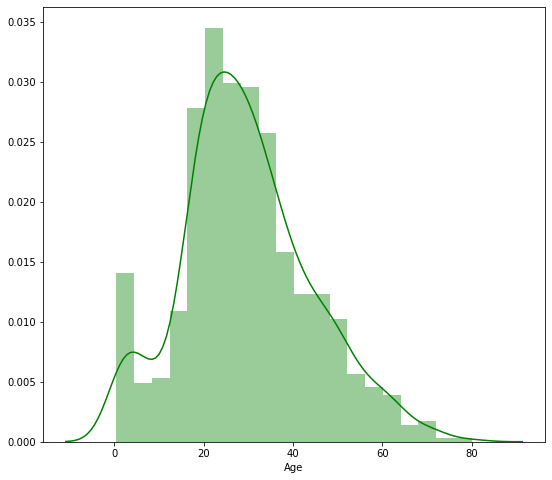

In [83]:
# Sale Price Distribution
print(titanic_df.Age.describe())
plt.figure(figsize=(9, 8))
sns.distplot(titanic_df.Age, color='g', bins=20, hist_kws={'alpha': 0.4});

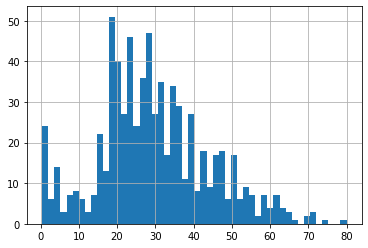

In [99]:
# Another way to plot a histogram of ages is shown below
titanic_df.Age.hist(bins=50)

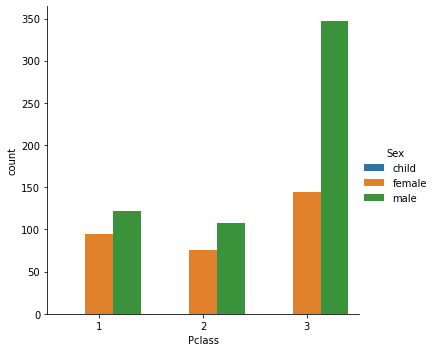

In [100]:
# Lets do a factorplot of passengers splitted into sex, children and class
sns.catplot('Pclass', 
               data=titanic_df, 
               kind='count', 
               hue='Sex', 
               order=[1,2,3], 
               hue_order=['child','female','male'], 
               aspect=1)

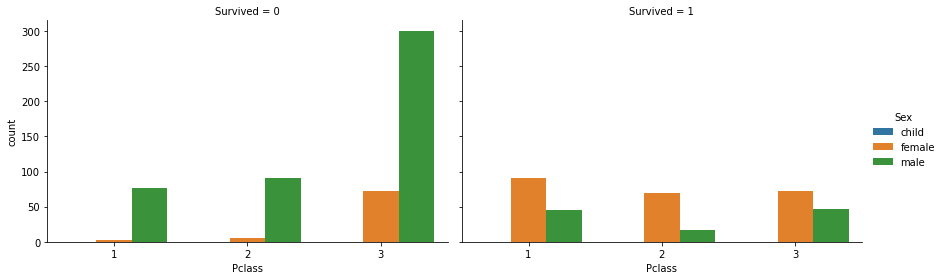

In [104]:
# Do the same as above, but split the passengers into either survived or not
sns.catplot('Pclass', 
               data=titanic_df, 
               kind='count', 
               hue='Sex', 
               col='Survived', 
               order=[1,2,3], 
               hue_order=['child','female','male'], 
               aspect=1.5, 
               height=4)

Hay mas 'varones' muertos que 'mujeres'
El indice de subrevivencia en 'mujeres; fue superior al de 'hombres'
comparativamente hay mas sobrevivientes en 1er y 3er clase que en 2da.
El indice de morvilidad en 3ra clase es superior a las dos clases restantes convinadas.

### 2.8 Explorar pasageros por edad (kde plot)

#### Agrupado por Genero

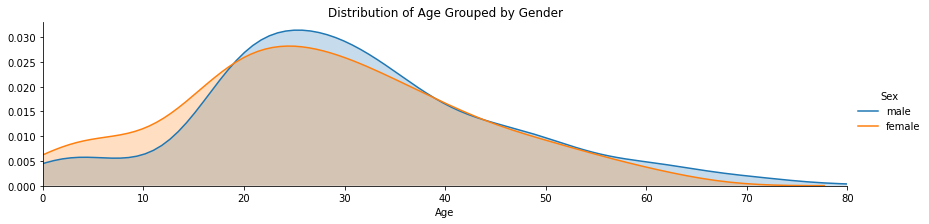

In [107]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribucion de Edad agrupada por Genero')
fig.add_legend()

#### Agrupado por Clase

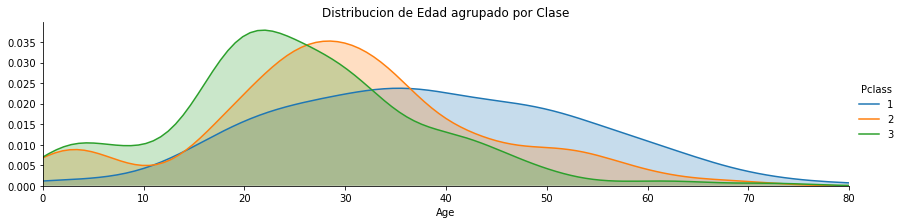

In [109]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribucion de Edad agrupado por Clase')
fig.add_legend()

- De la gráfica anterior, la clase 1 tiene una distribución normal. Sin embargo, las clases 2 y 3 tienen una distribución sesgada hacia los pasajeros de 20 y 30 años respectivamente.
- En promedio el grupo de pasageros de 3er clase era el mas joven.

In [119]:
# total number of passenger who did't survive
pclass3_df = titanic_df[titanic_df['Pclass']==1]
print(len(pclass3_df))

216


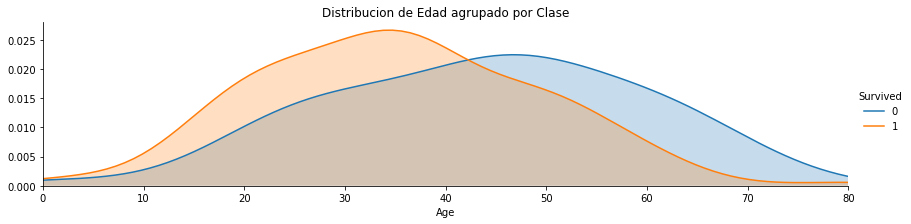

In [120]:
fig = sns.FacetGrid(pclass3_df, hue='Survived', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = pclass3_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribucion de Edad agrupado por Clase')
fig.add_legend()

- En 1er clase el promedio de edad de fallecidos fue superior.

### 2.9 Explorar pasageros por cabina 

In [123]:
deck = titanic_df['Cabin'].dropna()
deck.head()
# titanic_df['Cabin'].info

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [124]:
# Grab the first letter of the cabin letter
d = []
for c in deck:
    d.append(c[0])
d[0:10]    

['C', 'C', 'E', 'G', 'C', 'D', 'A', 'C', 'B', 'D']

In [125]:
from collections import Counter
Counter(d)

Counter({'C': 59, 'E': 32, 'G': 4, 'D': 33, 'A': 15, 'B': 47, 'F': 13, 'T': 1})

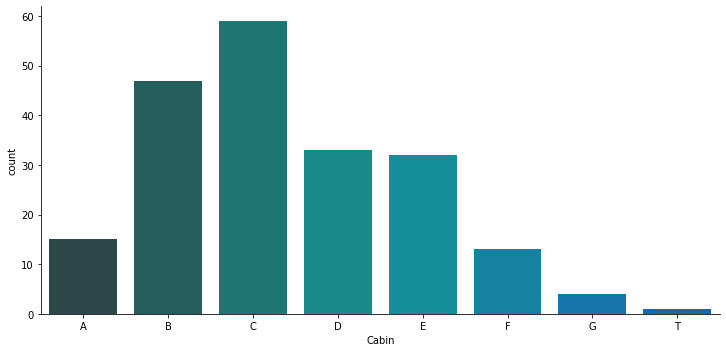

In [127]:
# Now lets factorplot the cabins. First transfer the d list into a data frame. Then rename the column Cabin 
cabin_df = DataFrame(d)
cabin_df.columns=['Cabin']
sns.catplot('Cabin', 
               data=cabin_df,
               kind='count', 
               order=['A','B','C','D','E','F','G','T'], 
               aspect=2, 
               palette='winter_d')

__seria interesante determinar el procentaje de sobreviviencia por clasificacion de cabina__

In [128]:
# Drop the 'T' cabin
cabin_df = cabin_df[cabin_df['Cabin'] != 'T']

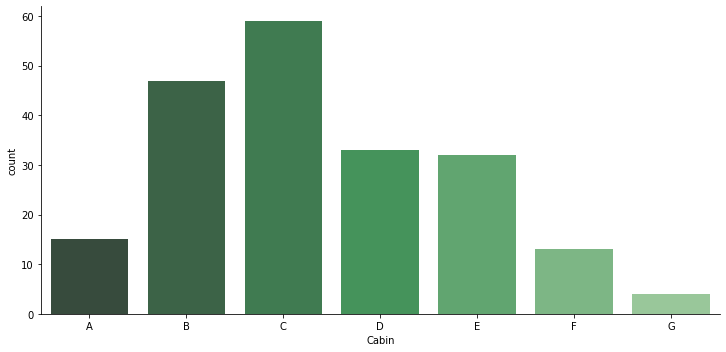

In [129]:
# Then replot the Cabins factorplot as above
sns.factorplot('Cabin', 
               data=cabin_df, 
               kind='count', 
               order=['A','B','C','D','E','F','G'], 
               aspect=2, 
               palette='Greens_d')

### 2.10 Explorar pasageros por procedencia y abordaje

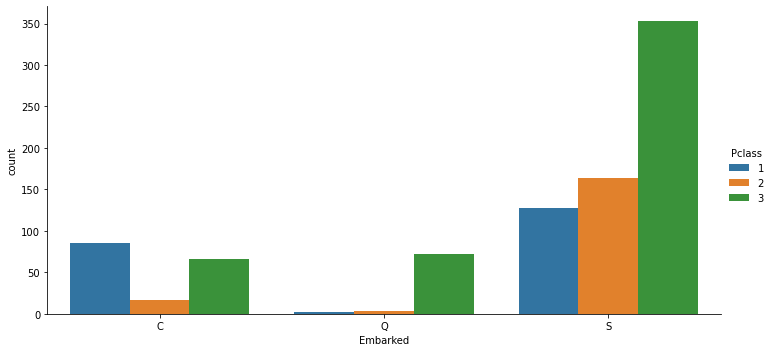

In [130]:
sns.factorplot('Embarked', 
               data=titanic_df, 
               kind='count', 
               hue='Pclass', 
               hue_order=range(1,4), 
               aspect=2,
               order = ['C','Q','S'])

De la figura anterior, se puede concluir que casi todos los pasajeros que abordaron desde Queenstown estaban en tercera clase. Por otro lado, muchos de los que abordaron desde Cherburgo estaban en primera clase. La mayor parte de los pasajeros que abordaron el barco provenían de Southampton, en el que 353 pasajeros estaban en tercera clase, 164 en segunda clase y 127 pasajeros en primera clase. 

- En tales casos, es posible que sea necesario observar la situación económica de estas diferentes ciudades en ese período de tiempo para comprender por qué la mayoría de los pasajeros que abordaron desde Queenstown estaban en tercera clase, por ejemplo.

- seria interesante determinar si la tasa de sobreviviencia tenia relacion con el puerto de abordaje.

In [132]:
# For tabulated values, use crosstab pandas method instead of the factorplot in seaborn
port = pd.crosstab(index=[titanic_df.Pclass], columns=[titanic_df.Embarked])
port.columns = [['Cherbourg','Queenstown','Southampton']]
port

,Cherbourg,Queenstown,Southampton
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


In [133]:
port.index

Int64Index([1, 2, 3], dtype='int64', name='Pclass')

In [134]:
port.columns

MultiIndex([(  'Cherbourg',),
            ( 'Queenstown',),
            ('Southampton',)],
           )

In [135]:
port.index=[['First','Second','Third']]
port.index

MultiIndex([( 'First',),
            ('Second',),
            ( 'Third',)],
           )

In [136]:
port

,Cherbourg,Queenstown,Southampton
First,85,2,127
Second,17,3,164
Third,66,72,353


### 2.11 Explorar pasageros con familia y sin ella

In [137]:
titanic_df[['SibSp','Parch']].head()

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0


In [148]:
# Alone dataframe i.e. the passenger has no siblings or parents
alone_df = titanic_df[(titanic_df['SibSp'] == 0) & (titanic_df['Parch']==0)]

# Add Alone column
alone_df['Alone'] = 'Alone'

# Not alone data frame i.e. the passenger has either a sibling or a parent.
not_alone_df = titanic_df[(titanic_df['SibSp'] != 0) | (titanic_df['Parch']!=0)]
not_alone_df['Alone'] = 'With family'

# Merge the above dataframes
comb = [alone_df, not_alone_df]

# Merge and sort by index
titanic_df = pd.concat(comb).sort_index()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [150]:
[len(alone_df), len(not_alone_df)]

[537, 354]

In [151]:
# Show the first five records of the alone data frame
alone_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Alone
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Alone


In [152]:
# Show the first five rows of the not alone data frame
not_alone_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,With family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,With family
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,With family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,With family


In [153]:
# Another way to perform the above
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With family'

titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [154]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,With family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,With family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,With family
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Alone


C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


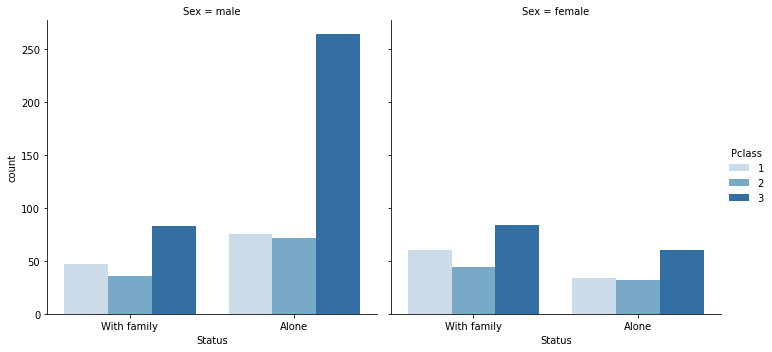

In [155]:
fg=sns.factorplot('Alone', 
                  data=titanic_df, 
                  kind='count', 
                  hue='Pclass', 
                  col='Sex', 
                  hue_order=range(1,4),
                  palette='Blues')
fg.set_xlabels('Status')

De la figura anterior, está claro que la mayoría de los niños viajaban con la familia en tercera clase. Para los hombres, la mayoría viajaba sola en tercera clase. Por otro lado, la cantidad de pasajeros femeninas que viajaron con la familia o solas entre la segunda y la tercera clase es comparable. Sin embargo, más mujeres viajaron con la familia que solas en primera clase.

### 2.12 Exploar factores que afectaron la sobreviviencia (lmplot, factorplot)

Ahora veamos los factores que ayudan a alguien a sobrevivir el hundimiento. Comenzamos este análisis agregando una nueva nube al marco de datos titánico. Use la columna Sobrevivido para asignar a la nueva columna con los factores 0: no y 1: sí usando el método de mapa

In [156]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,With family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,With family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,With family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone,no


#### Factor: Clase

De la figura siguiente, ser un hombre o una tercera clase reduce la posibilidad de sobrevivir.

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


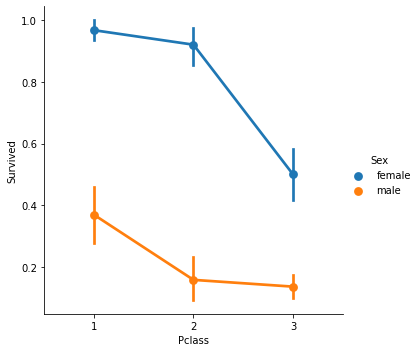

In [159]:
# Survived vs. class Grouped by gender
sns.factorplot('Pclass',
               'Survived', 
               hue='Sex', 
               data=titanic_df, 
               order=range(1,4), 
               hue_order = ['female','male'])
               #hue_order = ['child','female','male'])

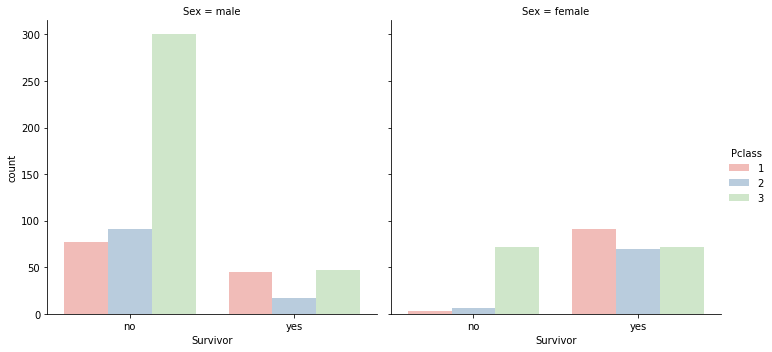

In [165]:
sns.factorplot('Survivor', 
               data=titanic_df, 
               hue='Pclass', 
               kind='count', 
               palette='Pastel1', 
               hue_order=range(1,4),
               col='Sex')

#### Factor: Genero

Parece haber una tendencia lineal general entre la edad y el campo sobrevivido. La trama muestra que cuanto mayor es el pasajero, menos posibilidades tiene de sobrevivir.

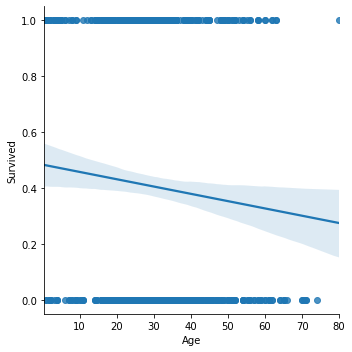

In [166]:
# Linear plot of age vs. survived
sns.lmplot('Age', 'Survived', data=titanic_df)

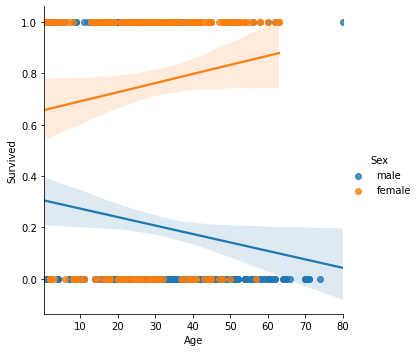

In [167]:
# Survived vs. Age grouped by Sex
sns.lmplot('Age', 'Survived', data=titanic_df, hue='Sex')

Las mujeres mayores tienen una mayor tasa de supervivencia que los hombres mayores, como se muestra en la figura anterior. Además, las mujeres mayores tienen una mayor tasa de supervivencia que las mujeres más jóvenes; Una tendencia opuesta a la de los pasajeros masculinos.

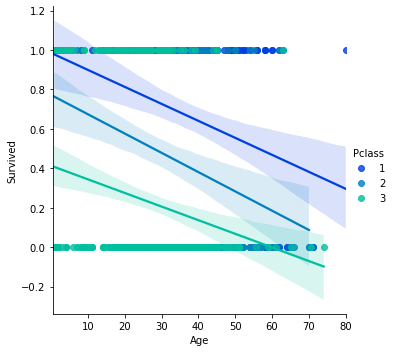

In [168]:
# Survived vs. Age gruped by class
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='winter', hue_order=range(1,4))

In all three classes, the chance to survive reduced as the passengers got older.

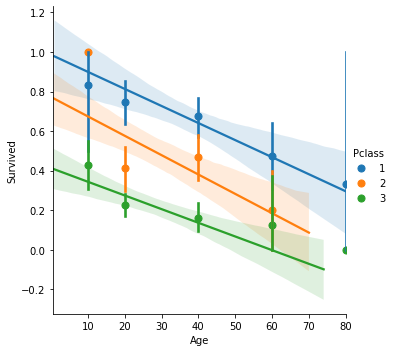

In [169]:
# Create a generation bin
generations = [10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,x_bins=generations, hue_order=[1,2,3])

#### Factor: Cubierta

In [170]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Alone', 'Survivor'],
      dtype='object')

In [171]:
titanic_DF = titanic_df.dropna(subset=['Cabin'])

In [173]:
d[0:10]

['C', 'C', 'E', 'G', 'C', 'D', 'A', 'C', 'B', 'D']

In [174]:
len(titanic_DF), len(d)

(204, 204)

In [175]:
titanic_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 1 to 889
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  204 non-null    int64  
 1   Survived     204 non-null    int64  
 2   Pclass       204 non-null    int64  
 3   Name         204 non-null    object 
 4   Sex          204 non-null    object 
 5   Age          185 non-null    float64
 6   SibSp        204 non-null    int64  
 7   Parch        204 non-null    int64  
 8   Ticket       204 non-null    object 
 9   Fare         204 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     202 non-null    object 
 12  Alone        204 non-null    object 
 13  Survivor     204 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 23.9+ KB


In [176]:
titanic_DF['Deck'] = d
titanic_DF

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [178]:
titanic_DF = titanic_DF[titanic_DF.Deck != 'T']
titanic_DF.head()

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


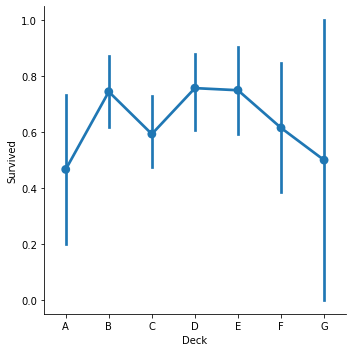

In [180]:
sns.factorplot('Deck', 'Survived', data=titanic_DF, order=['A','B','C','D','E','F','G'])

No parece haber ninguna relación entre el cubierta y la tasa de supervivencia como se muestra en la figura anterior!

#### Factor: Familia

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


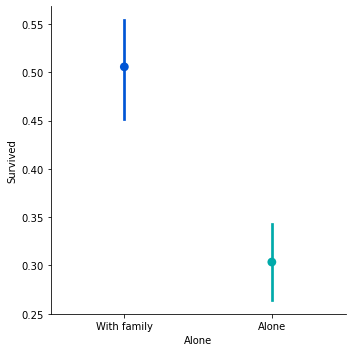

In [181]:
sns.factorplot('Alone', 
               'Survived', 
               data=titanic_df, 
               palette='winter')

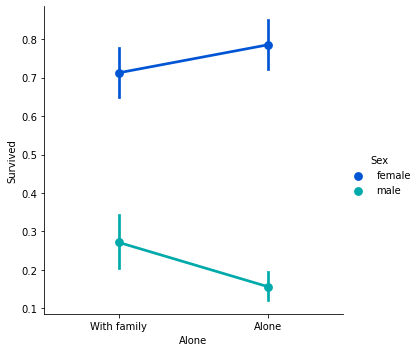

In [182]:
sns.factorplot('Alone', 
               'Survived', 
               data=titanic_df, 
               palette='winter', 
               hue='Sex',
               hue_order=['female', 'male'])
               #hue_order=['child', 'female', 'male'])

Parece que la tasa de supervivencia disminuye significativamente para los que estaban solos. Sin embargo, verifiquemos si un género o edad juegan un factor. De la siguiente figura, se puede concluir que la tasa de supervivencia para mujeres y niños es mucho más alta que la de los hombres, como se concluyó anteriormente y como se anticipó. Sin embargo, la tasa de supervivencia no es significativa ni para el género ni para los niños que estaban con la familia versus los que estaban solos. Además, la tasa de supervivencia para mujeres y niños aumenta para quienes estaban solos. Para los hombres, la tasa de supervivencia disminuye ligeramente para los que estaban solos frente a los que estaban con la familia.

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


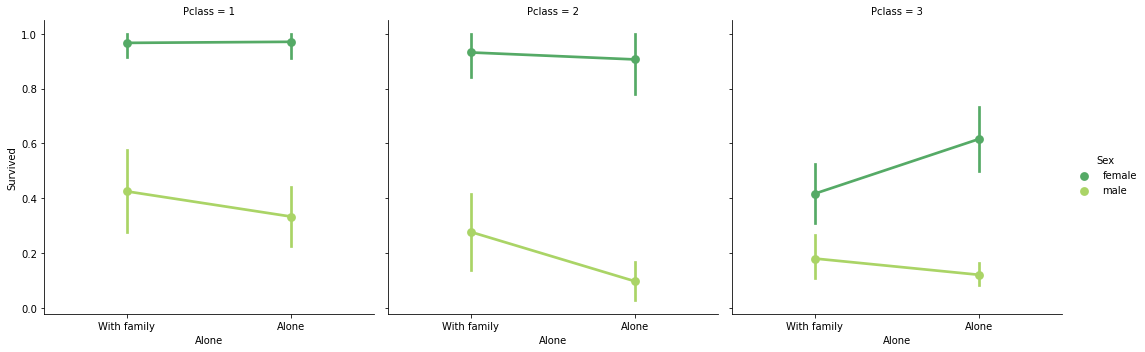

In [186]:
# Lets split it by class now!
sns.factorplot('Alone', 
               'Survived', 
               data=titanic_df, 
               palette='summer', 
               hue='Sex', 
               #hue_order=['child', 'female', 'male'], 
               hue_order=['female', 'male'], 
               col='Pclass', col_order=[1,2,3])